In [29]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
idx = np.hstack((np.where(y=='3')[0][:100], np.where(y=='5')[0][:100]))
X35 = X[idx]
y35 = y[idx]

In [30]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X35, y35)
importances = forest.feature_importances_

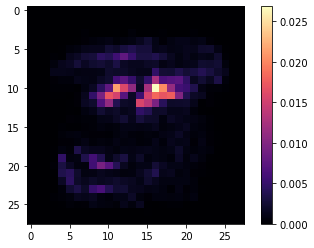

In [41]:
img = np.reshape(importances, (28,28)) 
plt.imshow(img, cmap='magma')
plt.colorbar()

In [42]:
from scipy import ndimage

In [48]:
k = np.ones(shape=(3,3))

img_conv = ndimage.convolve(img, k, mode='constant', cval=0.0)

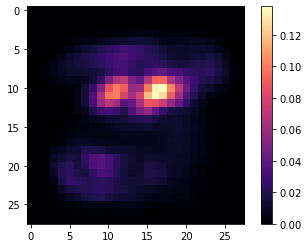

In [49]:
plt.imshow(img_conv, cmap='magma')
plt.colorbar()

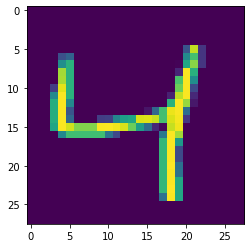

In [59]:
plt.imshow(np.reshape(X[2],(28,28)))